In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns

plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
    'figure.figsize': [10.4, 4.8]
})

In [2]:
print(plt.rcParams)

_internal.classic_mode: False
agg.path.chunksize: 0
animation.bitrate: -1
animation.codec: h264
animation.convert_args: ['-layers', 'OptimizePlus']
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.writer: ffmpeg
axes.autolimit_mode: data
axes.axisbelow: line
axes.edgecolor: black
axes.facecolor: white
axes.formatter.limits: [-5, 6]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 4
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: black
axes.labelpad: 4.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 0.8
axes.prop_cycle: cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines

## Milestone 4


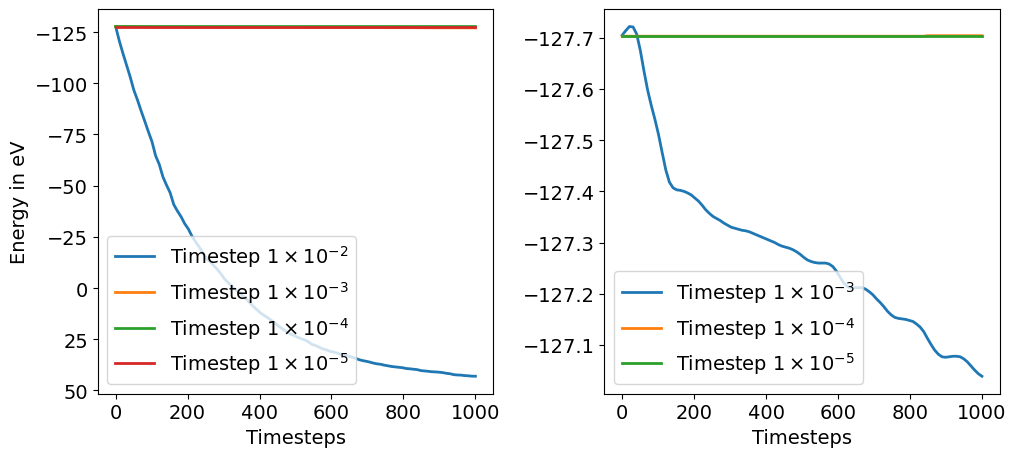

In [3]:
arr = np.loadtxt("../buildDir/milestones/04/plot/energy_0")
lst1 = ['$1 \\times 10^{-2}$','$1\\times10^{-3}$','$1\\times10^{-4}$','$1\\times10^{-5}$']
t = np.linspace(0,1000,len(arr))
fig, ax = plt.subplots(1,2)
ax[0].plot(t,arr, label='Timestep '+lst1[0])
for i in range(1,4,1):
    arr2 = np.loadtxt("../buildDir/milestones/04/plot/energy_"+str(i))
    ax[0].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[0].legend(loc="lower left")
for i in range(1,4,1):
    arr2 = np.loadtxt("../buildDir/milestones/04/plot/energy_"+str(i))
    ax[1].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[1].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()

ax[0].set_ylabel("Energy in eV")
ax[0].set_xlabel("Timesteps")
ax[1].set_xlabel("Timesteps")
plt.tight_layout()
#plt.show()
plt.savefig("ms4_ener.pdf", format="pdf", dpi=300)

## Milestone 5 + 6


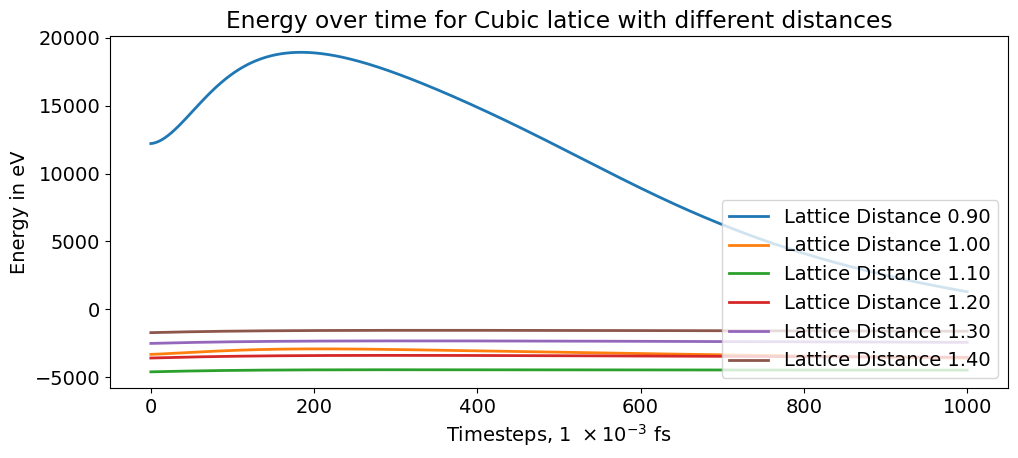

In [4]:
rng = np.array([0.90,1.00,1.10,1.20,1.30,1.40])
fig, ax = plt.subplots()
for i in rng:
    arr2 = np.loadtxt("../buildDir/milestones/05/plot/energy_cubic_big_"+'{:.2f}'.format(i))
    ax.plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Lattice Distance "+'{:.2f}'.format(i))
ax.set_title("Energy over time for Cubic latice with different distances")
ax.legend(loc="lower right")
ax.set_ylabel("Energy in eV")
ax.set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
plt.tight_layout()
plt.show()

In [5]:
data = pd.read_csv("ms5/data0")
data = data.query('name.str.contains("/")')
data['range'] = [int(x.split('/')[-1]) for x in data['name']]
data['Benchmark'] = [x.split('/')[0] for x in data['name']]
data['range'] *= data['range']*data['range']

data1 = pd.read_csv("ms5/data")
data1 = data.query('name.str.contains("/")')
data1['range'] = [int(x.split('/')[-1]) for x in data1['name']]
data1['Benchmark'] = [x.split('/')[0] for x in data1['name']]
data1['range'] *= data1['range']*data1['range']

data2 = pd.read_csv("ms5/data6")
data2 = data.query('name.str.contains("/")')
data2['range'] = [int(x.split('/')[-1]) for x in data2['name']]
data2['Benchmark'] = [x.split('/')[0] for x in data2['name']]
data2['range'] *= data2['range']*data2['range']

In [6]:
'''sns.relplot(data=data[19:],
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()'''

"sns.relplot(data=data[19:],\n            x='range', y='cpu_time',\n            style='Benchmark',\n            hue='Benchmark', kind='line')\n\nplt.xscale('log')\nplt.yscale('log')\n\nplt.xlabel('N')\nplt.ylabel('CPU time [ms]')\n\nplt.grid()\nplt.gca().set_aspect('equal')\nplt.gcf().tight_layout()\nplt.show()"

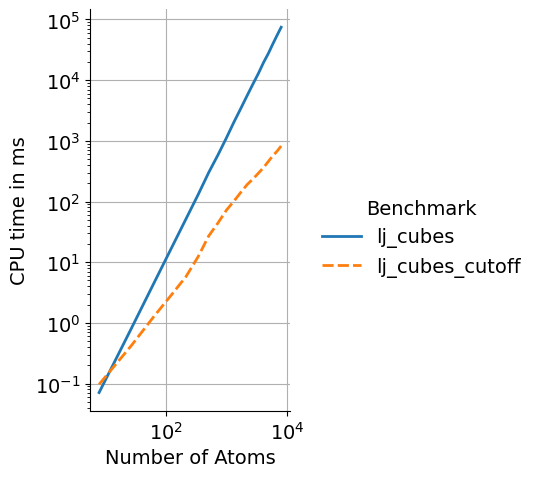

In [7]:
sns.relplot(data=data,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Atoms')
plt.ylabel('CPU time in ms')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()
#plt.savefig("ms5_neighbor.pdf", format="pdf", dpi=300)

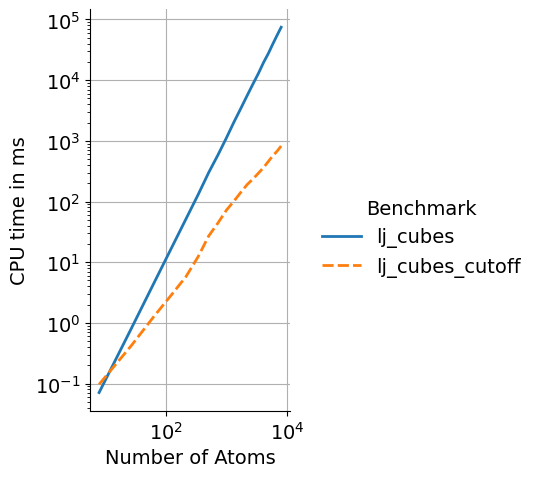

In [8]:
sns.relplot(data=data1,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Atoms')
plt.ylabel('CPU time in ms')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

In [9]:
'''sns.relplot(data=data2,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Atoms')
plt.ylabel('CPU time in ms')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()'''

"sns.relplot(data=data2,\n            x='range', y='cpu_time',\n            style='Benchmark',\n            hue='Benchmark', kind='line')\n\nplt.xscale('log')\nplt.yscale('log')\n\nplt.xlabel('Number of Atoms')\nplt.ylabel('CPU time in ms')\n\nplt.grid()\nplt.gca().set_aspect('equal')\nplt.gcf().tight_layout()\nplt.show()"

## Milestone 7


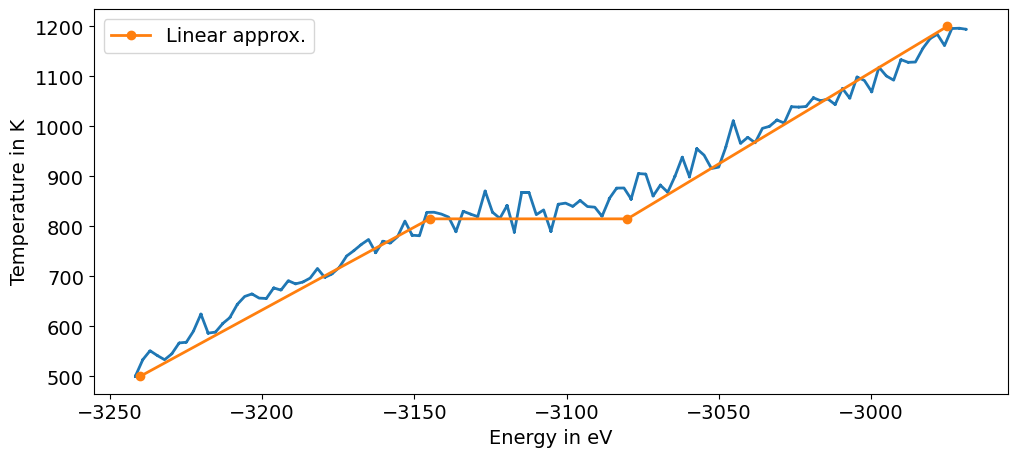

In [10]:
#%matplotlib notebook
# magic numbers 309, 923, 2057, 3871 and 6525
arr = np.fromfile("ms7/temp", sep="\n")
arr1 = np.fromfile("ms7/temp1", sep="\n")
ener = np.fromfile("ms7/energy", sep="\n")
ener1 = np.fromfile("ms7/energy1", sep="\n")
ener_all = np.concatenate((ener,ener1), axis=0)
temp_all = np.concatenate((arr, arr1), axis=0)


#plt.plot(ener1[25::25],arr1[25::25], label="smooth energy over temperature")
x = [500,815, 815,1200]
y = [-3240,-3145,-3080,-2975]
plt.plot(ener1,arr1)#, label="eV over K")
plt.plot(y,x,marker='o', label="Linear approx.")
plt.legend()
plt.xlabel("Energy in eV")
plt.ylabel("Temperature in K")
plt.tight_layout()
#plt.show()
plt.savefig("ms7_melt.pdf", format="pdf", dpi=300)
#print(arr)

In [11]:
def find_melting_point(temperature, energy):
    derivative = np.gradient(energy, temperature)
    melting_point_index = np.argmax(derivative)
    plt.plot(derivative, np.linspace(0,len(derivative),len(derivative)) )
    return temperature[melting_point_index]
#plt.plot(derivative, np.linspace(0,len(derivative),len(derivative)) )
print(find_melting_point(temp1, ener1))

NameError: name 'temp1' is not defined

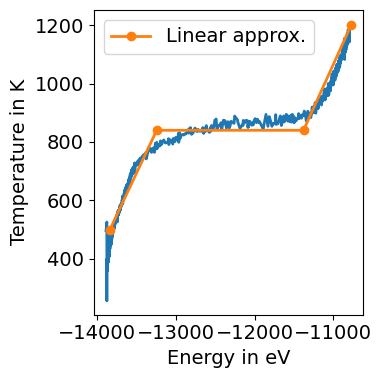

In [12]:
path2 = "ms7melt/"#"../buildDir/milestones/07/"
ener_all = np.fromfile(path2+"ener_melt_big", sep="\n")
temp_all = np.fromfile(path2+"temp_melt_big", sep="\n")
plt.figure(figsize=(4, 4))
#plt.plot(ener1[25::25],arr1[25::25], label="smooth energy over temperature")
x = [500,840, 840,1200]
y = [-13840,-13245,-11380,-10775]
plt.plot(ener_all,temp_all)#, label="eV over K")
plt.plot(y,x,marker='o', label="Linear approx.")
plt.legend()
#plt.ylim(500,1220)
#plt.xlim(-3250,-3000)
plt.xlabel("Energy in eV")
plt.ylabel("Temperature in K")
plt.tight_layout()
plt.show()
#plt.savefig("ms7_melt.pdf", format="pdf", dpi=300)

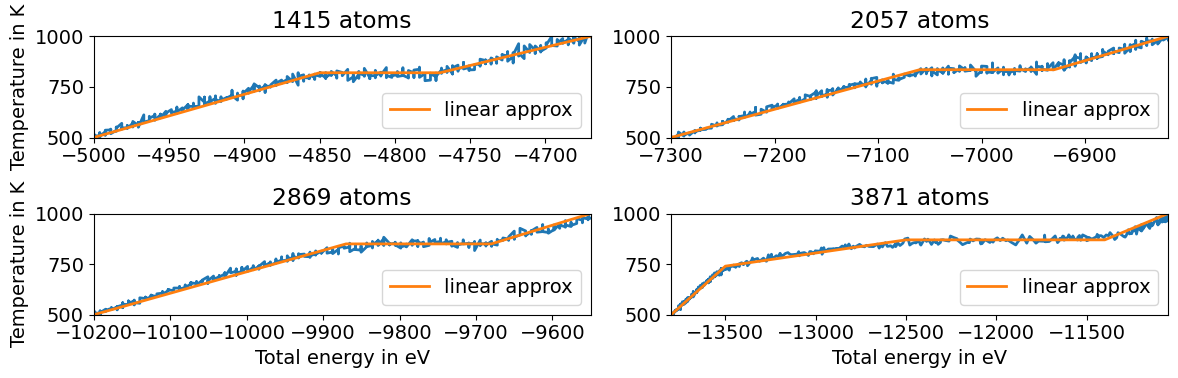

In [54]:
path2 = "ms7melt/"#"../buildDir/milestones/07/"
ener1 = np.fromfile(path2+"ener_melt1415", sep="\n")
temp1 = np.fromfile(path2+"temp_melt1415", sep="\n")

ener2 = np.fromfile(path2+"ener_melt2057", sep="\n")
temp2 = np.fromfile(path2+"temp_melt2057", sep="\n")

ener3 = np.fromfile(path2+"ener_melt2869", sep="\n")
temp3 = np.fromfile(path2+"temp_melt2869", sep="\n")

ener4 = np.fromfile(path2+"ener_melt_big", sep="\n")
temp4 = np.fromfile(path2+"temp_melt_big", sep="\n")
#x = [500,840, 840,1200]
#y = [-13840,-13245,-11380,-10775]
fig, axs = plt.subplots(2,2)
axs[0,0].plot(ener1,temp1)
axs[0,0].set_title("1415 atoms")
axs[0,0].set_ylim(500,1000)
axs[0,0].set_xlim(-5000,-4670)
x = [500,820, 820,1000]
y = [-5000,-4850,-4770,-4670]
axs[0,0].plot(y,x,label="linear approx")
h_l = 4850-4770
h_c = (y[0]-y[1])/(x[1]-x[0])

axs[0,1].plot(ener2,temp2)
axs[0,1].set_title("2057 atoms")
axs[0,1].set_ylim(500,1000)
axs[0,1].set_xlim(-7300,-6820)
y2 = [-7300,-7060,-6930,-6820]
x2 = [500,835, 835,1000]
axs[0,1].plot(y2,x2,label="linear approx")
h_l2 = 7060-6930
h_c2 = (y2[0]-y2[1])/(x2[1]-x2[0])

axs[1,0].plot(ener3,temp3)
axs[1,0].set_title("2869 atoms")
axs[1,0].set_ylim(500,1000)
axs[1,0].set_xlim(-10200,-9550)
x3 = [500,850, 850,1000]
y3 = [-10200,-9870,-9680,-9550]
axs[1,0].plot(y3,x3,label="linear approx")
h_l3 = 9870-9680
h_c3 = (y3[0]-y3[1])/(x3[1]-x3[0])

axs[1,1].plot(ener4,temp4)
axs[1,1].set_title("3871 atoms")
axs[1,1].set_ylim(500,1000)
axs[1,1].set_xlim(-13800,-11050)
x4 = [500,740,870, 870,1000]
y4 = [-13800,-13500,-12500,-11400,-11050]
h_l4 = 13500-12500
h_c4 = (y4[0]-y4[2])/(x4[2]-x4[0])
h_c5 = (y4[1]-y4[2])/(x4[2]-x4[1])
axs[1,1].plot(y4,x4,label="linear approx")
axs[0,1].legend()
axs[1,0].legend()
axs[0,0].legend()

axs[0,0].set_ylabel("Temperature in K")
axs[1,0].set_ylabel("Temperature in K")
axs[1,0].set_xlabel("Total energy in eV")
axs[1,1].set_xlabel("Total energy in eV")
#, label="eV over K")
#plt.plot(y,x,marker='o', label="Linear approx.")
plt.legend()
plt.tight_layout()
#plt.show()
plt.savefig("ms7_melt2.pdf", format="pdf", dpi=300)

In [14]:
def get_melting_temp(temp, temp1 = 850):
    first = np.where(temp > temp1)[0][0]
    last = np.where(temp < temp1)[0][-1]
    return [np.trapz(temp[first:last]/ (len(temp[first:last])-1 ) ),first,last]



print(get_melting_temp(temp1) )
print(get_melting_temp(temp2) )
print(get_melting_temp(temp3) )
print(get_melting_temp(temp4) )

[842.3896739130433, 530, 554]
[838.42909375, 456, 569]
[849.2945708661417, 433, 561]
[861.1428095238095, 287, 351]


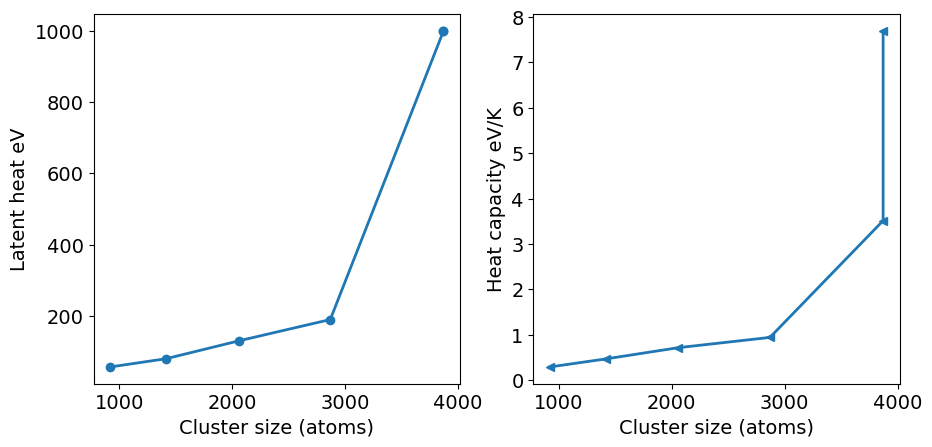

In [15]:
x = [500,840, 840,1200]
y = [-3240,-3145,-3080,-2975]

capac = np.array([-0.293,h_c,h_c2,h_c3,h_c4,h_c5])
latent = np.array([57,h_l,h_l2,h_l3,h_l4,h_l4])
clusters = np.array([923,1415,2057,2869,3871,3871])
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(clusters,latent,marker='o')
ax2.plot(clusters,capac*-1,marker='<')
ax1.set_ylabel("Latent heat eV")
ax1.set_xlabel("Cluster size (atoms)")
ax2.set_xlabel("Cluster size (atoms)")
ax2.set_ylabel("Heat capacity eV/K")
plt.savefig("ms7_capa_latent.pdf", format="pdf", dpi=300)

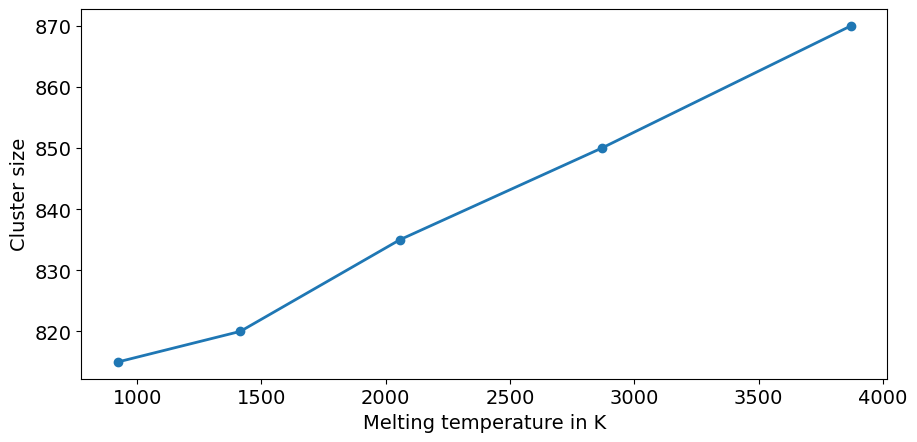

In [16]:
t_melt = np.array([815,820,835,850,870])
plt.plot(clusters[:-1],t_melt, marker='o')
plt.ylabel("Cluster size")
plt.xlabel("Melting temperature in K")

#plt.show()
plt.savefig("ms7_melt_temps.pdf", format="pdf", dpi=300)

In [55]:
#plt.plot(clusters,)
#print(h_c,h_c2,h_c3,h_c4,h_c5)
#print(h_l,h_l2,h_l3,h_l4,h_l4)

## Milestone 8


## Milestone 9


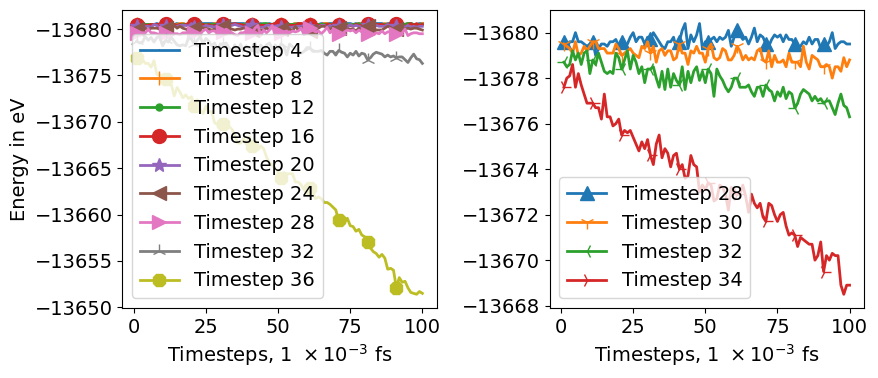

In [18]:
steps = 1000/10
rang = np.arange(2,39,2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
markers = [',', '+', '.', 'o', '*','<','>','^','1','2','3','4','8']
count = 0
for i in rang:
    if (i%4 == 0):
        time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7/mpi_temp_ener/ener_s_"+str(i), sep="\n")
        ax[0].plot(time,ener,marker=markers[count],markersize=10,markevery=10, label="Timestep "+str(i))
        count += 1
    if (i>27 and i <36):
        time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7/mpi_temp_ener/ener_s_"+str(i), sep="\n")
        ax[1].plot(time,ener,marker=markers[count],markersize=10,markevery=10,label="Timestep "+str(i))
        count += 1
ax[1].legend(loc="lower left")
ax[0].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[0].set_ylabel("Energy in eV")
ax[0].set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
ax[1].set_xlabel("Timesteps, $1~\\times 10^{-3}~$fs")
plt.tight_layout()
plt.savefig("ms7_ener.pdf", format="pdf", dpi=300)

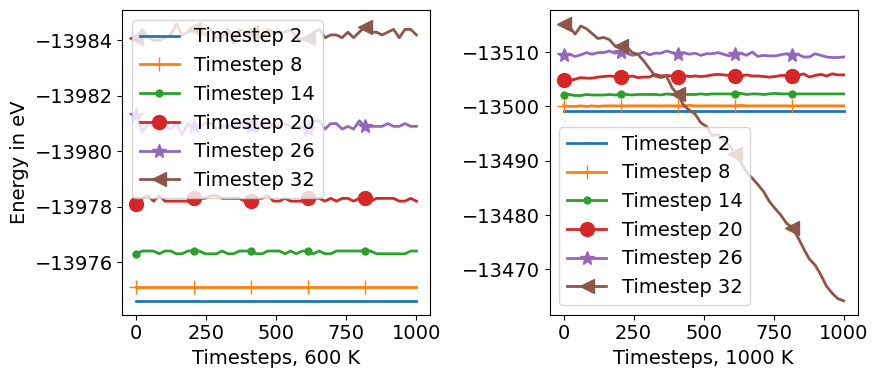

In [19]:
rang = np.arange(2,33,6)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
markers = [',', '+', '.', 'o', '*','<','>','^','1','2','3','4','8']
count = 0
for i in rang:
        ener = np.fromfile("ms7_parallel/ener_s_600_"+str(i), sep="\n")
        ax[0].plot(np.linspace(0,1000,len(ener)),ener,marker=markers[count],
                   markersize=10,markevery=10, label="Timestep "+str(i))
        #time = np.arange(1,steps+1,1)
        ener = np.fromfile("ms7_parallel/ener_s_1000_"+str(i), sep="\n")
        ax[1].plot(np.linspace(0,1000,len(ener)),ener,marker=markers[count],
                   markersize=10,markevery=10, label="Timestep "+str(i))
        count += 1
ax[1].legend(loc="lower left")
ax[0].legend(loc="upper left")
ax[0].set_ylabel("Energy in eV")
ax[0].set_xlabel("Timesteps, 600 K")
ax[1].set_xlabel("Timesteps, 1000 K")
ax[0].invert_yaxis()
ax[1].invert_yaxis()

plt.tight_layout()

In [35]:
path = "ms9/whisker_smallstress_" # 3050 atoms
path4 = "ms9/whisker_r20stress_" # 11200 atoms
path5 = "ms9/whisker_r25stress_" # 22330 atoms
arr_s =np.fromfile(path+"0_1",sep="\n")
arr =np.fromfile(path5+"0_3",sep="\n")
arr1 =np.fromfile(path4+"0_3",sep="\n")

arr2 =np.fromfile(path4+"0_5",sep="\n")
arr3 =np.fromfile(path4+"100_5",sep="\n")

arr4 =np.fromfile(path5+"0_3",sep="\n")
arr5 =np.fromfile(path5+"0_5",sep="\n")

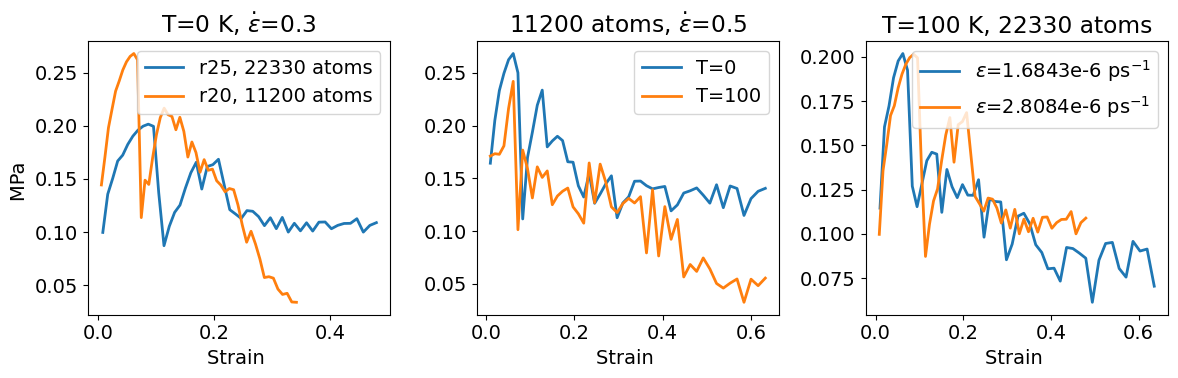

In [36]:
# stress = arr2[1::2].sum()/len(arr[1::2])*500
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
})
plt.rcParams['figure.figsize'] = [12, 4]
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.plot(arr[1::2]/144,arr[0::2],label=r'r25, 22330 atoms')#arr[0::2])
ax1.plot(arr1[1::2]/(144),arr1[0::2],label=r'r20, 11200 atoms')

ax2.plot(arr2[1::2]/144,arr2[0::2],label=r'T=0')
ax2.plot(arr3[1::2]/(144),arr3[0::2],label=r'T=100')

deltal = arr4[1::2]
s = (deltal[1] - deltal[0])/(144+ deltal[0])/(1000*5)
#s = arr4[1::2]/(144*5*(50000/50))
s_a = np.average(s)

deltal = arr5[1::2]
s2 = (deltal[1] - deltal[0])/(144+ deltal[0])/(1000*5)
#s2 = arr5[1::2]/(201*5*(50000/50))
s_a2 = np.average(s2)

string1 = r'$\epsilon$=%.4fe-6 ps$^{-1}$' % (s_a*1000000)
string2 = r'$\epsilon$=%.4fe-6 ps$^{-1}$' % (s_a2*1000000)
ax3.plot(arr5[1::2]/(201),arr5[0::2],label=string1)
ax3.plot(arr4[1::2]/(144),arr4[0::2],label=string2)
plt.legend()
ax1.legend()
ax2.legend()
# title 
#plt.ylabel("MPa")
ax1.set_title(r'T=0 K, $\dot\epsilon$=0.3')
ax2.set_title(r'11200 atoms, $\dot\epsilon$=0.5')
ax3.set_title(r'T=100 K, 22330 atoms')
ax1.set_ylabel("MPa ")
ax1.set_xlabel("Strain ")
ax2.set_xlabel("Strain ")
plt.xlabel("Strain ")
#plt.ticklabel_format(useOffset=False,style='plain')
plt.tight_layout()
plt.savefig("ms9_strain.pdf", format="pdf", dpi=300)

In [294]:
#print(arr1[1::2]/(144*5*250))


s = arr1[1::2]/(144.25*5*1000*np.arange(1,50))
print(s)

[1.20031196e-06 1.20452686e-06 1.20835586e-06 1.21210052e-06
 1.21581976e-06 1.21953322e-06 1.22324932e-06 1.22697574e-06
 1.23071057e-06 1.23445685e-06 1.23821522e-06 1.24198729e-06
 1.24577523e-06 1.24957663e-06 1.25338879e-06 1.25721837e-06
 1.26106229e-06 1.26492586e-06 1.26879869e-06 1.27268631e-06
 1.27659322e-06 1.28051048e-06 1.28444880e-06 1.28839977e-06
 1.29237296e-06 1.29635515e-06 1.30035561e-06 1.30437237e-06
 1.30840375e-06 1.31245292e-06 1.31651814e-06 1.32059792e-06
 1.32469513e-06 1.32881232e-06 1.33294380e-06 1.33709224e-06
 1.34125626e-06 1.34543829e-06 1.34963694e-06 1.35385095e-06
 1.35808598e-06 1.36233721e-06 1.36660352e-06 1.37089018e-06
 1.37519276e-06 1.37951322e-06 1.38385044e-06 1.38820624e-06
 1.39258232e-06]


In [43]:
deltal = arr5[1::2]
(deltal[1] - deltal[0])/(144+ deltal[0])/(1000*5)

2.8083776764030593e-06

In [44]:
(deltal[-1] - deltal[-2])/(144+ deltal[-2])/(1000*5)

2.4444667955580935e-06

In [ ]:
path = "../buildDir/milestones/09/whisker_smallstress_"
arr =np.fromfile(path+"0_20",sep="\n")
stress = arr[1::2]/(144)
plt.plot(stress,arr[0::2],label="Temp=0, max_strain=2%")#arr[0::2])
plt.legend()
plt.ylabel("MPa")
plt.xlabel("Strain ")
plt.ticklabel_format(useOffset=False,style='plain')

In [ ]:
path = "../buildDir/milestones/09/plots/whisker_smalltemp_"
path1 = "../buildDir/milestones/09/plots/whisker_smallener_"
arr = np.fromfile(path+"100_10",sep="\n")
arr2 = np.fromfile(path1+"100_10",sep="\n")

In [ ]:
plt.plot(arr,arr2)

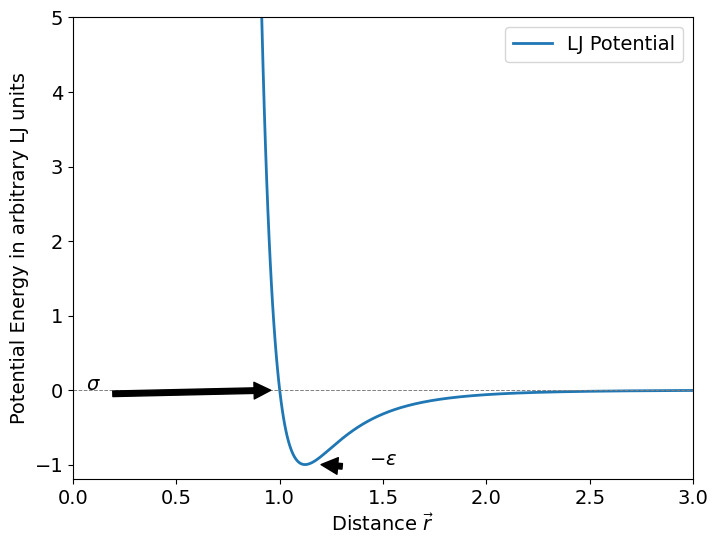

In [80]:
# Define the Lennard-Jones potential function
def lj_potential(r, epsilon=1, sigma=1):
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Generate an array of r values from 0.1 to 3 (avoiding r=0 to prevent division by zero)
r = np.linspace(0.1, 3, 500)
# Calculate the Lennard-Jones potential for each r value
potential = lj_potential(r)

# Plot the potential
plt.figure(figsize=(8, 6))
plt.plot(r, potential, label='LJ Potential')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Add a horizontal line at y=0

# Mark sigma with an arrow
sigma = 1
plt.annotate(r'$\sigma$', xy=(sigma, 0), xytext=(0.1,0),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

# Mark epsilon with an arrow
epsilon = 1
min_potential = -epsilon
plt.annotate(r'$-\epsilon$', xy=(sigma+.2, min_potential), xytext=(sigma + 0.5, min_potential),
             arrowprops=dict(facecolor='black', shrink=0.5),
             horizontalalignment='center')
plt.ylim(-1.2,5)
plt.xlim(0,3)
plt.xlabel(r'Distance $\vec{r}$')
plt.ylabel('Potential Energy in arbitrary LJ units')
# plt.title('Lennard-Jones Potential with σ=1, ε=1')
plt.legend()
#plt.grid(True)
#plt.show()
plt.savefig("lj.pdf", format="pdf", dpi=300)